# ANALISE DE FERMENTAÇÕES
 

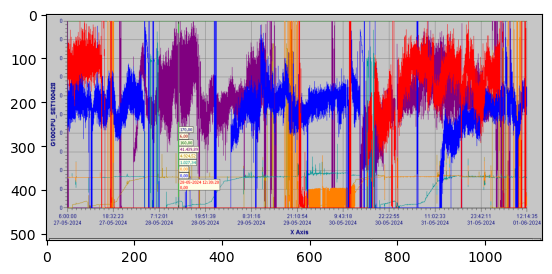

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('IMGFERMENTEC.png')
imgplot = plt.imshow(img)
plt.show()


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
df1=pd.read_csv("MF1.csv")
df2=pd.read_csv("MF3.csv")
df3=pd.read_csv("MF5.csv")


In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
df1

,TimeStamp,Time Zone,G100CPU_SET100424,G100CP2_FT123105,G100CP2_FT125003
0,5/27/2024 6:30,GMT-3.0,170.0,"28,416.67","4,938.50"
1,5/27/2024 6:30,GMT-3.0,170.0,"26,302.34","4,936.31"
2,5/27/2024 6:30,GMT-3.0,170.0,"30,214.06","4,935.81"
3,5/27/2024 6:30,GMT-3.0,170.0,"25,067.58","4,937.84"
4,5/27/2024 6:30,GMT-3.0,170.0,"24,785.16","4,939.88"
...,...,...,...,...,...
45264,6/1/2024 12:14,GMT-3.0,170.0,"30,003.65","4,863.31"
45265,6/1/2024 12:14,GMT-3.0,170.0,"29,333.98","4,851.44"
45266,6/1/2024 12:14,GMT-3.0,170.0,"30,814.06","4,839.56"
45267,6/1/2024 12:14,GMT-3.0,170.0,"31,291.02","4,827.69"


In [6]:
df2

,TimeStamp,Time Zone,G100CPU_SET100428,G100CP2_FT123305,G100CP2_FT125005
0,5/27/2024 6:30,GMT-3.0,168.0,0,0
1,5/27/2024 6:30,GMT-3.0,168.0,0,0
2,5/27/2024 6:30,GMT-3.0,168.0,0,0
3,5/27/2024 6:30,GMT-3.0,168.0,0,0
4,5/27/2024 6:30,GMT-3.0,168.0,0,0
...,...,...,...,...,...
39027,6/1/2024 2:40,GMT-3.0,170.0,"29,476.56","3,384.27"
39028,6/1/2024 2:40,GMT-3.0,170.0,"30,039.84","2,575.16"
39029,6/1/2024 2:40,GMT-3.0,170.0,"20,007.81",0
39030,6/1/2024 2:40,GMT-3.0,170.0,0,0


In [8]:
df3.describe()

,G100CP2_SET123001
count,45269.000000
mean,147.414705
std,50.303943
min,0.000000
25%,160.000000
50%,160.000000
75%,170.000000
max,210.000000


In [9]:
df2.rename(columns={'G100CPU_SET100428': 'Concentração MF3'}, inplace=True)
df1.rename(columns={'G100CPU_SET100424': 'Concentração MF1'}, inplace=True)
df3.rename(columns={'G100CP2_SET123001': 'Concentração MF5'}, inplace=True)
df2.rename(columns={'G100CP2_FT123305': 'Sangria MF3'}, inplace=True)
df1.rename(columns={'G100CP2_FT125003': 'Mosto MF1'}, inplace=True)
df3.rename(columns={'G100CP2_FT125007': 'Mosto MF5'}, inplace=True)
df1.rename(columns={'G100CP2_FT123105': 'Sangria MF1'}, inplace=True)
df3.rename(columns={'G100CP2_FT123506': 'Sangria MF5'}, inplace=True)
df2.rename(columns={'G100CP2_FT125005': 'Mosto MF3'}, inplace=True)


In [10]:
df1.describe()

,Concentração MF1
count,45269.000000
mean,123.339267
std,65.787303
min,1.100000
25%,60.000000
50%,160.000000
75%,170.000000
max,190.000000


In [11]:
df2.describe()

,Concentração MF3
count,39032.000000
mean,114.826634
std,65.459793
min,3.000000
25%,50.000000
50%,150.000000
75%,165.000000
max,500.000000


In [12]:
df3.describe()

,Concentração MF5
count,45269.000000
mean,147.414705
std,50.303943
min,0.000000
25%,160.000000
50%,160.000000
75%,170.000000
max,210.000000


In [13]:
df1= df1.drop(columns= "Time Zone")
df2= df2.drop(columns= "Time Zone")
df3= df3.drop(columns= "Time Zone")

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45269 entries, 0 to 45268
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TimeStamp         45269 non-null  object 
 1   Concentração MF1  45269 non-null  float64
 2   Sangria MF1       45269 non-null  object 
 3   Mosto MF1         45269 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39032 entries, 0 to 39031
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TimeStamp         39032 non-null  object 
 1   Concentração MF3  39032 non-null  float64
 2   Sangria MF3       39032 non-null  object 
 3   Mosto MF3         39032 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45269 entries, 0 to 45268
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TimeStamp         45269 non-null  object 
 1   Concentração MF5  45269 non-null  float64
 2   Mosto MF5         45269 non-null  object 
 3   Sangria MF5       45269 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


In [14]:
# Lista de colunas para converter
columns_to_convert = ['Mosto MF5', 'Sangria MF5',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df3[column] = df3[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)



In [15]:
# Lista de colunas para converter
columns_to_convert = ['Sangria MF3', 'Mosto MF3', ]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df2[column] = df2[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [16]:
# Lista de colunas para converter
columns_to_convert = ['Mosto MF1', 'Sangria MF1']

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df1[column] = df1[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45269 entries, 0 to 45268
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TimeStamp         45269 non-null  object 
 1   Concentração MF1  45269 non-null  float64
 2   Sangria MF1       45269 non-null  float64
 3   Mosto MF1         45269 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.4+ MB


In [18]:
df1.describe()

,Concentração MF1,Sangria MF1,Mosto MF1
count,45269.000000,45269.000000,45269.000000
mean,123.339267,18112.863805,3961.017704
std,65.787303,14020.363166,3433.251958
min,1.100000,0.000000,0.000000
25%,60.000000,0.000000,916.690000
50%,160.000000,24575.310000,4885.220000
75%,170.000000,28939.320000,4997.620000
max,190.000000,50000.000000,28655.590000


In [19]:
df2.describe()

,Concentração MF3,Sangria MF3,Mosto MF3
count,39032.000000,39032.000000,39032.000000
mean,114.826634,20296.216073,3736.648983
std,65.459793,15299.463690,1952.172728
min,3.000000,0.000000,0.000000
25%,50.000000,0.000000,1237.075000
50%,150.000000,26403.515000,4930.690000
75%,165.000000,32032.810000,4985.720000
max,500.000000,50000.000000,24812.810000


In [20]:
df3.describe()

,Concentração MF5,Mosto MF5,Sangria MF5
count,45269.000000,45269.000000,45269.000000
mean,147.414705,2782.332286,13043.338348
std,50.303943,4917.980238,17523.818274
min,0.000000,0.000000,0.000000
25%,160.000000,0.000000,0.000000
50%,160.000000,277.690000,0.000000
75%,170.000000,4969.220000,32978.120000
max,210.000000,30000.000000,50000.000000


# ANALISE MF1 BATELADA 24C194

In [19]:
df1['TimeStamp'] = pd.to_datetime(df1['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-05-28 09:19:00', '2024-05-30 14:23:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe1 = []
for start, end in time_limits:
    mask = (df1['TimeStamp'] >= start) & (df1['TimeStamp'] <= end)
    df_temp = df1.loc[mask]
    dataframe1.append(df_temp)


In [20]:
MF1_final= pd.concat(dataframe1)

In [21]:
MF1_final.isna().sum()

TimeStamp           0
Concentração MF1    0
Sangria MF1         0
Mosto MF1           0
dtype: int64

In [22]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF1_final['Concentração MF1'] /= 1000


In [23]:

MF1_final['Produção de Creme'] = MF1_final['Concentração MF1'] * MF1_final['Sangria MF1']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF1_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF1_final = MF1_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF1_final.rename(columns={'Mosto MF1': 'Consumo de Mosto MF'}, inplace=True)


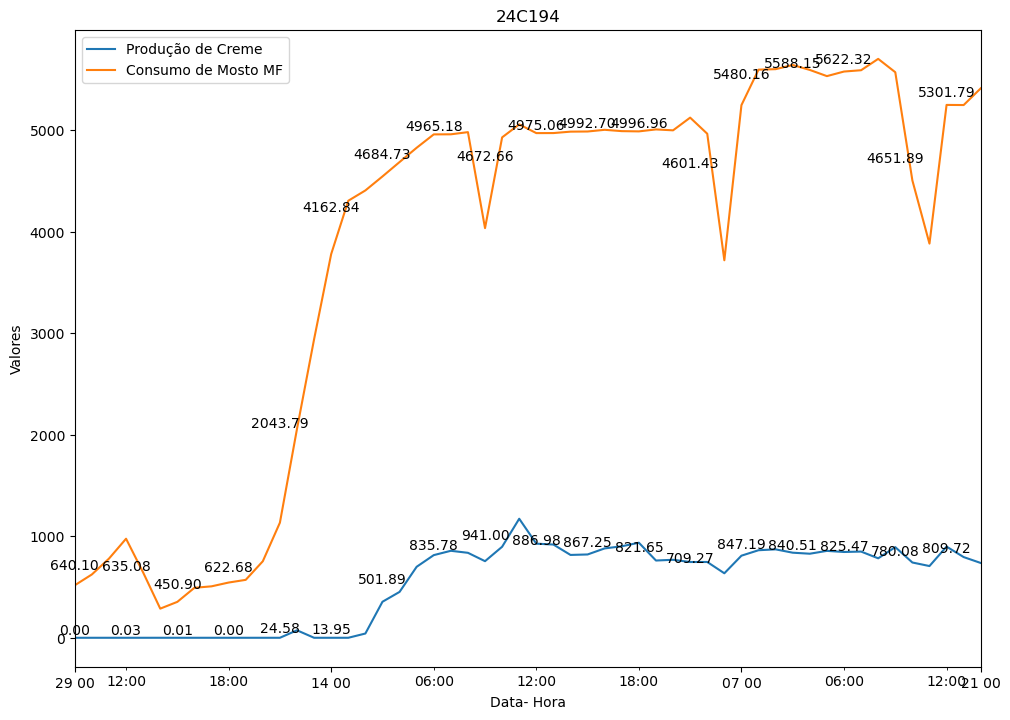

In [59]:

import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Modificando a Fig para que ela saia na horizontal no pdf
fig, ax = plt.subplots(figsize=(11.69,8.27))  

# Plot 'Produção de Creme' e 'Consumo de Mosto MF'
MF1_final['Produção de Creme'].plot(ax=ax, label='Produção de Creme')
MF1_final['Consumo de Mosto MF'].plot(ax=ax, label='Consumo de Mosto MF')

# A amostra do rotulo de dados a cada 3H
MF1_final_3h = MF1_final.resample('3H').mean()

# Adiciona o rotulo de dados para cada ponto
for x, y in zip(MF1_final_3h.index, MF1_final_3h['Produção de Creme']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
for x, y in zip(MF1_final_3h.index, MF1_final_3h['Consumo de Mosto MF']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Nomezin
ax.set_title('24C194')
ax.set_xlabel('Data- Hora')
ax.set_ylabel('Valores')


ax.legend()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))


pdf_pages = PdfPages('output.pdf')
pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()

plt.show()



In [25]:
MF1_final["Produção de Creme"].sum()

29116.04715309375

In [26]:
MF1_final["Consumo de Mosto MF"].sum()

207265.26832554204

# ANALISE DO MF5 BATELADA 24C197
## TEM B.O

In [27]:

df3['TimeStamp'] = pd.to_datetime(df3['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-05-29 00:15:00', '2024-06-01 04:50:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe3 = []
for start, end in time_limits:
    mask = (df3['TimeStamp'] >= start) & (df3['TimeStamp'] <= end)
    df_temp = df3.loc[mask]
    dataframe3.append(df_temp)


In [28]:
MF5_final= pd.concat(dataframe3)

In [29]:
MF5_final.isna().sum()

TimeStamp           0
Concentração MF5    0
Mosto MF5           0
Sangria MF5         0
dtype: int64

In [30]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF5_final['Concentração MF5'] /= 1000

In [31]:

MF5_final['Produção de Creme'] = MF5_final['Concentração MF5'] * MF5_final['Sangria MF5']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF5_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF5' e 'Produção de Creme'
MF5_final = MF5_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF5_final.rename(columns={'Mosto MF5': 'Consumo de Mosto MF5'}, inplace=True)


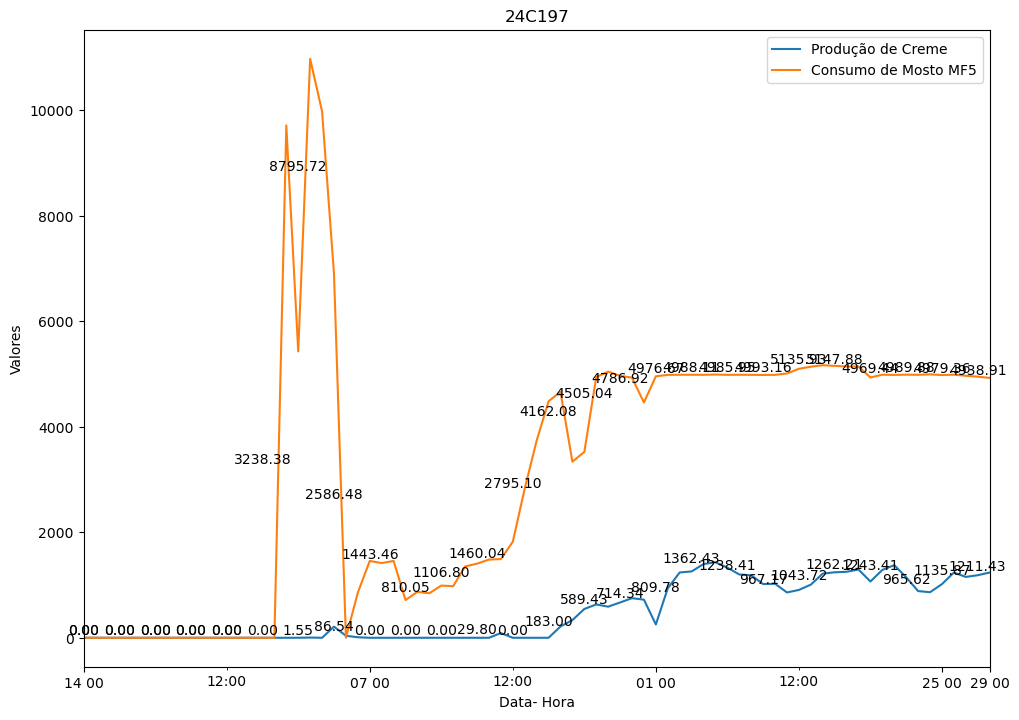

In [57]:


# Modificando a Fig para que ela saia na horizontal no pdf
fig, ax = plt.subplots(figsize=(11.69,8.27))  

# Plot 'Produção de Creme' e 'Consumo de Mosto MF'
MF5_final['Produção de Creme'].plot(ax=ax, label='Produção de Creme')
MF5_final['Consumo de Mosto MF5'].plot(ax=ax, label='Consumo de Mosto MF5')

# A amostra do rotulo de dados a cada 3H
MF5_final_3h = MF5_final.resample('3H').mean()

# Adiciona o rotulo de dados para cada ponto
for x, y in zip(MF5_final_3h.index, MF5_final_3h['Produção de Creme']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
for x, y in zip(MF5_final_3h.index, MF5_final_3h['Consumo de Mosto MF5']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Nomezin
ax.set_title('24C197')
ax.set_xlabel('Data- Hora')
ax.set_ylabel('Valores')


ax.legend()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))


pdf_pages = PdfPages('24C197.pdf')
pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()

plt.show()


In [33]:
MF5_final["Produção de Creme"].sum()

37322.78013284853

In [34]:
MF5_final["Consumo de Mosto MF5"].sum()

252447.1913807189

# ANALISE DO MF5 BATELADA 24C193 

## TEM B.O

In [35]:
df2['TimeStamp'] = pd.to_datetime(df2['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-05-27 06:47:00', '2024-05-29 12:24:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe21 = []
for start, end in time_limits:
    mask = (df2['TimeStamp'] >= start) & (df2['TimeStamp'] <= end)
    df_temp = df2.loc[mask]
    dataframe21.append(df_temp)

In [36]:
MF3_final= pd.concat(dataframe21)

In [37]:
MF3_final.isna().sum()

TimeStamp           0
Concentração MF3    0
Sangria MF3         0
Mosto MF3           0
dtype: int64

In [38]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF3_final['Concentração MF3'] /= 1000

In [39]:

MF3_final['Produção de Creme'] = MF3_final['Concentração MF3'] * MF3_final['Sangria MF3']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF3_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF5' e 'Produção de Creme'
MF3_final = MF3_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF3_final.rename(columns={'Mosto MF3': 'Consumo de Mosto MF3'}, inplace=True)

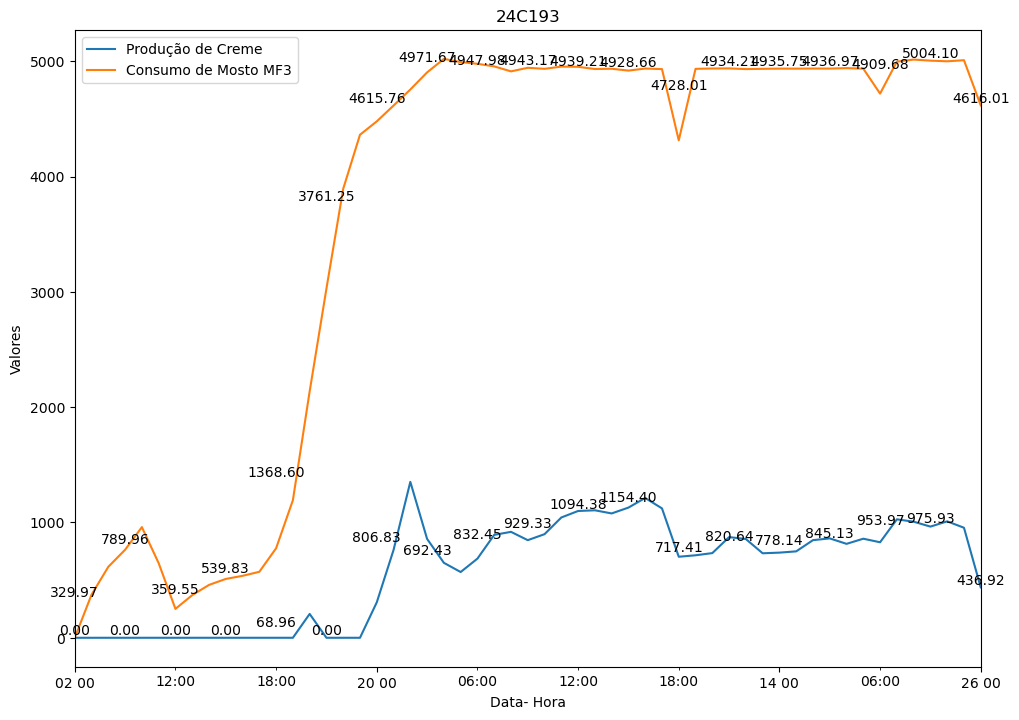

In [56]:

# Modificando a Fig para que ela saia na horizontal no pdf
fig, ax = plt.subplots(figsize=(11.69,8.27))  

# Plot 'Produção de Creme' e 'Consumo de Mosto MF'
MF3_final['Produção de Creme'].plot(ax=ax, label='Produção de Creme')
MF3_final['Consumo de Mosto MF3'].plot(ax=ax, label='Consumo de Mosto MF3')

# A amostra do rotulo de dados a cada 3H
MF3_final_3h = MF3_final.resample('3H').mean()

# Adiciona o rotulo de dados para cada ponto
for x, y in zip(MF3_final_3h.index, MF3_final_3h['Produção de Creme']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
for x, y in zip(MF3_final_3h.index, MF3_final_3h['Consumo de Mosto MF3']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Nomezin
ax.set_title('24C193')
ax.set_xlabel('Data- Hora')
ax.set_ylabel('Valores')


ax.legend()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))


pdf_pages = PdfPages('24C193.pdf')
pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()

plt.show()

In [41]:
MF3_final["Produção de Creme"].sum()

32446.907035700056

In [42]:
MF3_final["Consumo de Mosto MF3"].sum()

202449.0481777778

# ANALISE DO MF5 BATELADA 24C196

## TEM B.O

In [43]:
df2['TimeStamp'] = pd.to_datetime(df2['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-05-29 21:59:00', '2024-06-01 02:41:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe22 = []
for start, end in time_limits:
    mask = (df2['TimeStamp'] >= start) & (df2['TimeStamp'] <= end)
    df_temp = df2.loc[mask]
    dataframe22.append(df_temp)

In [44]:
MF32_final= pd.concat(dataframe22)

In [45]:
MF32_final.isna().sum()

TimeStamp           0
Concentração MF3    0
Sangria MF3         0
Mosto MF3           0
dtype: int64

In [46]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF32_final['Concentração MF3'] /= 1000

In [47]:

MF32_final['Produção de Creme'] = MF32_final['Concentração MF3'] * MF32_final['Sangria MF3']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF32_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF5' e 'Produção de Creme'
MF32_final = MF32_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF32_final.rename(columns={'Mosto MF3': 'Consumo de Mosto MF3'}, inplace=True)

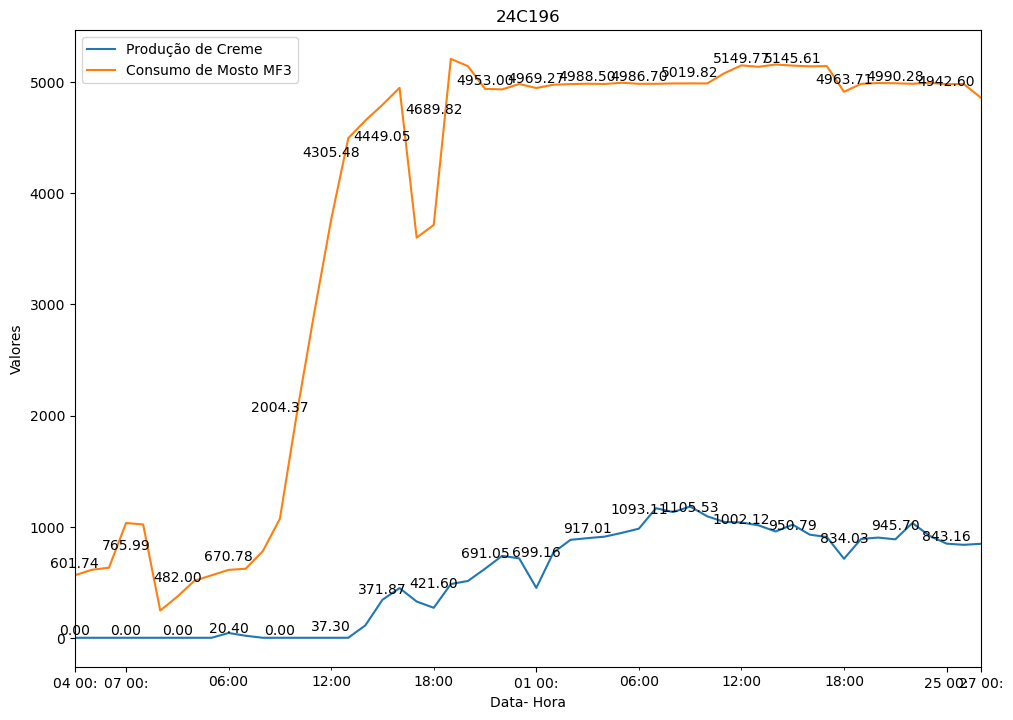

In [54]:

# Modificando a Fig para que ela saia na horizontal no pdf
fig, ax = plt.subplots(figsize=(11.69,8.27))  

# Plot 'Produção de Creme' e 'Consumo de Mosto MF'
MF32_final['Produção de Creme'].plot(ax=ax, label='Produção de Creme')
MF32_final['Consumo de Mosto MF3'].plot(ax=ax, label='Consumo de Mosto MF3')

# A amostra do rotulo de dados a cada 3H
MF32_final_3h = MF32_final.resample('3H').mean()

# Adiciona o rotulo de dados para cada ponto
for x, y in zip(MF32_final_3h.index, MF32_final_3h['Produção de Creme']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
for x, y in zip(MF32_final_3h.index, MF32_final_3h['Consumo de Mosto MF3']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Nomezin
ax.set_title('24C196')
ax.set_xlabel('Data- Hora')
ax.set_ylabel('Valores')


ax.legend()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:'))


pdf_pages = PdfPages('24C196.pdf')
pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()

plt.show()

In [50]:
MF32_final["Produção de Creme"].sum()

29798.437611971574

In [51]:
MF32_final["Consumo de Mosto MF3"].sum()

204235.45778497527